<a href="https://colab.research.google.com/github/binaria010/Mate2B/blob/main/Resumen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumen 

Este notebook es un resumen de las funciones y métodos numéricos usados en las prácticas 1-4

## Práctica 1: Taylor e interpolacion:

En esta práctica usamos python para:



### Grafico de funciones:
definimos funciones matemáticas y graficamos usando la libreria <font color = "magenta">matplotlib.pyplot</font>



#### Ejemplo:

Queremos graficar la función $f(x) = \cos(x) +1$ en el intervalo $[-3,3]$. 
Para esto definimos la funcion en python que calcula los valores de $f$, definimos una tabla de valores o grilla.

Para la grilla de valores usamos la función <font color ="magenta">linspace</font> de numpy

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  y = np.cos(x) + 1

  return y


grilla = np.linspace(-3, 3, 100)    # me da 100 puntos en el [-3,3] equiespaciados

print(grilla)


[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

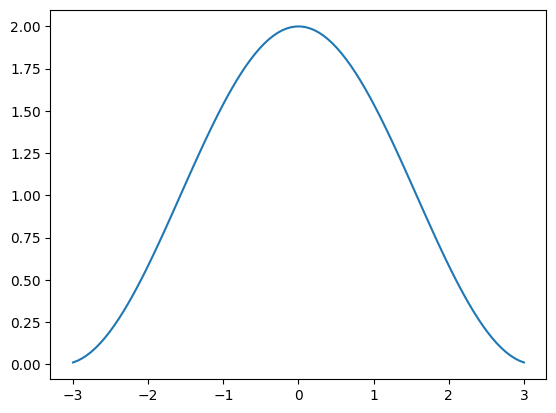

In [2]:
# plot de la funcion en los valores de la grilla definida

plt.plot(grilla, f(grilla))
plt.show()

### Interpolación: 

Dadas dos listas $x = [x_0, x_1,\dots, x_{n+1}]$, $y = [y_0,y_1,\dots,y_n]$


* la función <font color = "magenta">lagrange</font> de la libreria <font color = "magenta">scipy.interpolate</font> nos da el polinomio interpolador en dichos puntos.

Una forma de importar esta función es: <font color = "magenta">from scipy.interpolate import lagrange</font> una vez importada la usamos en los $x's$ e $y's$:
$$
  p = \text{lagrange}(x,y)
$$

esto nos devuelve un <font color = "magenta">objeto polinomio</font> $p$ (como un poly1d) de grado $n=\text{ longitud de la lista } x -1$ que podemos evaluar en distintos valores. 

* Usando <font color = "magenta">polyfit</font> y <font color = "magenta">poly1d</font> de la libreria <font color = "magenta">numpy</font>. Por ejemplo para las mismas listas definimos:

$$
\text{coefs} = \text{np.polyfit}(x,y, grado)
$$

esto nos devuelve una lista de numeros que representan los coeficientes del polinomio interpolador, ordenados en mayor a menor grado. Una vez obtenidos los coeficientes podemos definir el polinomio interpolador con la función <font color = "magenta">poly1d</font> de numpy

$$
p = \text{np.poly1d}(\text{coefs})
$$

este $p$ es tambien un objeto polinomio al que podemos evaluar en distintos valores.




#### Ejemplo:



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange


In [4]:
# usando funcion lagrange:

x = np.array([0,1,3,5])
y = np.array([1,2,3,4])

p = lagrange(x,y)

print(p)

         3       2
0.03333 x - 0.3 x + 1.267 x + 1


In [5]:
# evaluar p en algun valor o valores

p([1,2,3,4])

array([2. , 2.6, 3. , 3.4])

In [6]:
# usando polyfit y poly1d:

coefs = np.polyfit(x,y, deg = len(x)-1)
q = np.poly1d(coefs)

print(q)

         3       2
0.03333 x - 0.3 x + 1.267 x + 1


In [7]:
# evaluar q en algun valor o valores

q([1,2,3,4])

array([2. , 2.6, 3. , 3.4])

#### Interpolacion en nodos de Chebyshev:

Si elegimos como lista de x's los ceros de un polinomio de Chebyshev, llamamos al polinomio "el interpolador en nodos de Chebyshev"


Si la interpolación ocurre en el intervalo $[-1,1]$ entonces los ceros del polinomio de Chebyshev de grado $n$ en dicho intervalo son:
$$
x_j = \cos\left(\frac{(2j+1)\pi}{2n} \right),\qquad j=0,1,2\dots, n-1
$$

En python definimos esta lista de $x's$ como:
$$
x = \text{[ np.cos((2*j+1)*np.pi/(2*n))  for j in range(n)]}
$$

para obtener los $y's$ y hacer la interpolacion es necesario tener la funcion que queremos interpolar pues $y_j=f(x_j)$

##### ejemplo:

Queremos hallar el polinomio interpolador de grado $n=4$ de $f(x) = e^{x^2}$ en $[-1,1]$ en los nodos de Chebyshev.  

Ojo: si queremos un polinomio interpolador de grado 4 necesitamos $5$ nodos, es decir necesitamos las raices del polinomio de Chebyshev de grado $n=5$


In [8]:
n =5

x = np.array([np.cos((2*j +1)*np.pi/(2*n)) for j in range(n)]) 

print("la longitud de x = cantidad nodos = ", len(x))

la longitud de x = cantidad nodos =  5


In [9]:
# defino la funcion f: usamos la forma abreviada lambda pero se puede usar def.
func = lambda x: np.exp(x**2)

# defino los y's :

y = func(x)

print(y)

[2.47071726 1.41268409 1.         1.41268409 2.47071726]


In [10]:
# defino el polinomio interpolador: podemos usar lagrange o polyfit + poly1d:

p = lagrange(x,y)

print(p)

        4             3          2
0.7719 x - 3.109e-15 x + 0.9278 x - 2.22e-16 x + 1


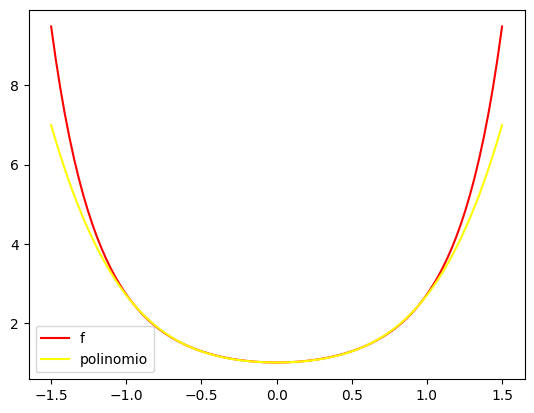

In [11]:
# grafiquemos f y p:

grilla  = np.linspace(-1.5,1.5, 100) #defino la grilla donde voy a graficar

plt.plot(grilla, func(grilla), label = "f", color = "red")
plt.plot(grilla, p(grilla), label = "polinomio", color = "yellow")
plt.legend()
plt.show()

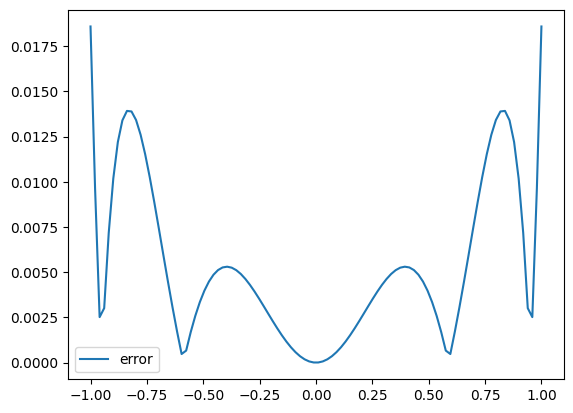

In [12]:
# grafiquemos el modulo de la diferencia entre la funcion y el polinomio. Esto es el error:
grilla = np.linspace(-1,1, 100)

error = np.abs(func(grilla) - p(grilla))  # esto ya es una lista de numeros que me da la diferencia entre f y p en cada valor de la grilla

plt.plot(grilla, error, label = "error")
plt.legend()
plt.show()

In [13]:
# una estimacion numerica del error en la interpolacion se obtiene calculando el maximo valor de error:

estimacion = np.max(error)

print("estimacion numerica del error de interpolacion es:", estimacion)

estimacion numerica del error de interpolacion es: 0.018587650755703677


## Práctica 2: Soluciones de ecuaciones no lineales

En esta práctica usamos distintos métodos iterativos para hallar en forma aproximada una solución de una ecuación no lineal (equivalentemente una raiz de una función no lineal):

* Bisección
* Newton
* Secante
* punto fijo




### Bisección: 

En este metodo vamos particionando el intervalo de partida (donde sabemos que hay una raiz) en intervalos de tamaño la mitad del anterior.


#### Ejemplo:

Queremos hallar una aproximacion de la solucion de $x = \sqrt[3]{0.9}$

Sabemos por Bolzano que $f(x) = x^3 -0.9$ tiene una raiz en $[0,1]$

In [14]:
f = lambda x: x**(3) - 0.9

a = 0
b = 1
tol = 1e-8

# iteracion de biseccion:

i = 0
fa = f(a)

while abs(b-a) > tol :
    
    p = (a+b)/2
    fp = f(p)
  
    print("en la iteración " + str(i) +"-esima p = ", p) # le pido imprima, pero no es necesario
            
    if fp == 0:    # si p justo es la raiz le pido que pare el while
        break
            
    if fa*fp > 0 : # chequeo si NO hay cambio de signo en [a,p]. Si no hay cambio se ejecuta el if
        a = p      # redefino el intervalo como  [p, b]
        fa = fp    # f(a) pasa a ser lo que habiamos calculado antes: fp

    else:          # si SI hay cambio en [a,p] se ejecuta este else
        b = p      # redefino el intervalo como [a, p]

    i = i+1        # me permite ir contando los pasos

en la iteración 0-esima p =  0.5
en la iteración 1-esima p =  0.75
en la iteración 2-esima p =  0.875
en la iteración 3-esima p =  0.9375
en la iteración 4-esima p =  0.96875
en la iteración 5-esima p =  0.953125
en la iteración 6-esima p =  0.9609375
en la iteración 7-esima p =  0.96484375
en la iteración 8-esima p =  0.966796875
en la iteración 9-esima p =  0.9658203125
en la iteración 10-esima p =  0.96533203125
en la iteración 11-esima p =  0.965576171875
en la iteración 12-esima p =  0.9654541015625
en la iteración 13-esima p =  0.96551513671875
en la iteración 14-esima p =  0.965484619140625
en la iteración 15-esima p =  0.9654998779296875
en la iteración 16-esima p =  0.9654922485351562
en la iteración 17-esima p =  0.9654884338378906
en la iteración 18-esima p =  0.9654903411865234
en la iteración 19-esima p =  0.965489387512207
en la iteración 20-esima p =  0.9654889106750488
en la iteración 21-esima p =  0.9654891490936279
en la iteración 22-esima p =  0.9654892683029175
en l

### Newton:

El metodo consiste en inicializar en una semilla $x_0$ e iterar lo siguiente:

$$
x_j = x_{j-1} - \frac{f(x_j)}{f'(x_{j-1}}, \qquad j=1,...
$$

El criterio de parada es cuando se llegue a $|x_{j}-x_{j-1}|<tol$ para una toleracia dada.

#### Ejemplo: 
Para el problema de hallar $\sqrt[3]{0.3}$:

In [15]:
f = lambda x: x**(3) - 0.9  # definimos f
derf = lambda x: 3*x**2     # definimos f'

tol = 1e-8

x_old = 2  # empezamos en este valor

x_new = x_old - f(x_old)/derf(x_old)
         
i = 1   #inicio i en 1 porque ya calculo un primer valor a partir de xold =2
while np.abs(x_new- x_old) > tol :

    print("en la iteración "+ str(i) + " la aprox es x = ", x_new) #    # si quiero que vaya imprimiendo los puntos:
    x_old = x_new    # redefino: el nuevo pasa a ser el viejo
    x_new = x_old - f(x_old)/derf(x_old)   #calculo un nuevo valor
    
    i = i + 1   # aumento el contador de pasos
    

en la iteración 1 la aprox es x =  1.4083333333333332
en la iteración 2 la aprox es x =  1.090144097039864
en la iteración 3 la aprox es x =  0.9791999809640585
en la iteración 4 la aprox es x =  0.965680462116926
en la iteración 5 la aprox es x =  0.9654894224113105
en la iteración 6 la aprox es x =  0.9654893846056313


### Secante:

Este método es similar a Newtom. Reemplazamos la defivada de $f$ por el cociente diferencial. Inicializamos en dos valores $x_0,x_1$, la iteración para calcular la siguiente aproximación es:
$$
x_{j+1} = x_j - f(x_j)\frac{x_{j} - x_{j-1}}{f(x_{j}) - f(x_{j-1})} \qquad j=1,2,....
$$

el criterio de parada es cuando llegamos a que la diferencia en modulo de dos valores sucesivos sea menor que una tolerancia dad: $|x_{j+1}-x_j|\leq tol$

#### Ejemplo:

seguimos calculando $\sqrt[3]{0.9}$

In [16]:
f = lambda x: x**(3) - 0.9  # definimos f
derf = lambda x: 3*x**2     # definimos f'

tol = 1e-8

x_oold, x_old = 1, 2  # empezamos en estos valores

x_new = x_old - f(x_old)*(x_old - x_oold)/(f(x_old) - f(x_oold))  #calculamos un primer valor

i = 1

while np.abs(x_new - x_old) > tol:
  
    print("en la iteración "+ str(i) + " la aprox es x = ", x_new) #    # si quiero que vaya imprimiendo los puntos:
    
    x_oold = x_old   # redefinimos para que x my viejo pase a ser viejo
    x_old = x_new    # redefino: el nuevo pasa a ser el viejo
    
    x_new = x_old - f(x_old)*(x_old - x_oold)/(f(x_old) - f(x_oold))   #calculo un nuevo valor

    i = i + 1   # aumento el contador de pasos




en la iteración 1 la aprox es x =  0.9857142857142858
en la iteración 2 la aprox es x =  0.9773963140413274
en la iteración 3 la aprox es x =  0.9657333863010046
en la iteración 4 la aprox es x =  0.9654923686784345
en la iteración 5 la aprox es x =  0.965489385359646


### Punto fijo:

La idea en este metodo es reemplazar el problema de hallar aproximacion de la solucion de $f(x)=0$ por el de hallar una aproximacion a la solucion de $g(x)=x$ con $g$ una función contractiva que hay que elegir (o determinar). La iteracion es:

$$
x_{n+1} = g(x_n)
$$

#### Ejemplo: 

Hallar una aproximacion de la raiz de $f(x) = x^3 -x +1$. 

tomamos como $g(x) = \sqrt[3]{x+1}$ y hay que chequear que $g$ es contraccion en algun intervalo donde $f$ tenga raiz.

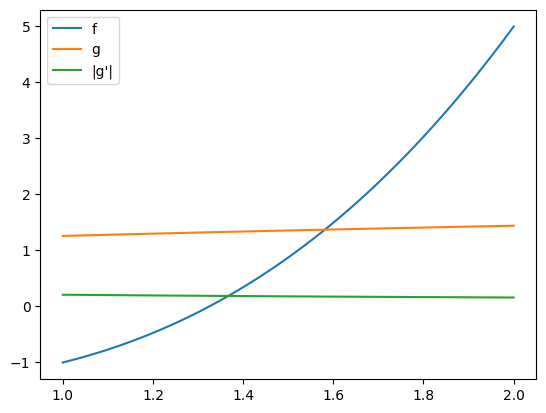

In [17]:
f = lambda x: x**3 -x -1
g = lambda x: (x+1)**(1/3)
derg = lambda x: 1/3*(x+1)**(-2/3)


#ploteamos g para chequear si satisface ser
x = np.linspace(1,2,100)
plt.plot(x, f(x), label = "f")
plt.plot(x, g(x), label = "g")
plt.plot(x, np.abs(derg(x)), label = "|g'|")
plt.legend()



In [18]:
# aplicamos el metodo:
xold = 2
xnew = g(xold)
tol = 1e-8

i =1
while np.abs(xold - xnew) > tol:
  xold = xnew
  xnew = g(xold)
  print("en el paso " + str(i)+ " la aproximacion es: ", xnew)
  i = i+1


en el paso 1 la aproximacion es:  1.346676703722613
en el paso 2 la aproximacion es:  1.3288758858138945
en el paso 3 la aproximacion es:  1.3255072719244825
en el paso 4 la aproximacion es:  1.3248678680484822
en el paso 5 la aproximacion es:  1.3247464317046989
en el paso 6 la aproximacion es:  1.3247233658541786
en el paso 7 la aproximacion es:  1.324718984591807
en el paso 8 la aproximacion es:  1.3247181523859666
en el paso 9 la aproximacion es:  1.3247179943111884
en el paso 10 la aproximacion es:  1.3247179642853968
en el paso 11 la aproximacion es:  1.324717958582095


## Práctica 3: Ecuaciones diferenciales

En esta práctica implementamos los métodos de Euler, Euler modificado, Taylor de orden 2 y Runge Kutta para resolver un problema del estilo:

$$
x'(t)=f(t,x(t)),\qquad x(t_{0})=x_{0}
$$

en algun intervalo $[t_0, T]$.

$x(t)\in \mathbb{R}^n$. Primero hacemos el caso 1-dimensional y despues pasamos a sistemas y ecuaciones de orden 2.

### Euler


La iteracion del metodo es:

$$
x_{n+1}=x_{n}+hf(t_{n},x_{n}),
$$
donde $h$ es el paso y $t_n = t_0 + nh$.

In [19]:
def euler(f,t0,T,x0,n):

  t = np.linspace(t0, T, n+1) #Esto tiene todos los tiempos separados por el paso h, recordar h = (T-t0)/n
  
  x = np.zeros(n+1) #Una lista de 0s que vamos a ir rellenando con las solucion en cada t_i
  
  x[0]=x0           #El primer valor es la condicion inicial
  
  h = (T-t0)/n      #paso

  # la iteracion:

  for i in range(1, n+1): #x[0] ya lo rellenamos, asique empezamos por el 1, y vamos hasta n
    x[i] = x[i-1] + h * f(t[i-1], x[i-1])

  return(t,x) #pedimos que nos devuelve la grilla de los tiempos (t) y el valor en cada punto (x)  para el grafico .

### Euler modificado

La iteración de este método es:

$$
x_{i}=x_{i-1}+h f\left(t_{i-1}+\frac{h}{2}, x_{i-1}+\frac{h}{2} f\left(t_{i-1}, x_{i-1}\right)\right),
$$

In [20]:
def euler_mod(f,t0,T,x0,n):

  t = np.linspace(t0, T, n+1) #Esto tiene todos los tiempos separados por el paso h, recordar h = (T-t0)/n

  x = np.zeros(n+1) #Una lista de 0s que vamos a ir rellenando con las solucion
  x[0]=x0           #El primer valor es la condicion inicial
  h = (T-t0)/n      #paso

  # la iteracion:
  for i in range(1, n+1): 

    x[i] = x[i-1] + h * f(t[i-1] + h/2, x[i-1] + 0.5 * h * f(t[i-1], x[i-1]))


  return(t,x) #Esta funcion ya nos devuelve la grilla para el grafico (t) y el valor en cada punto (x).

### Taylor de orden 2

la iteración es:


$$
x_{i}=x_{i-1}+h f\left(t_{i-1}, x_{i-1})+ 0.5*h^2f'\left(t_{i-1}, x_{i-1}\right)\right),
$$

donde $f'$ denota la derviada de $f(t, x(t))$ con respecto de $t$.


In [21]:
def Taylor2(f,derf, t0, T, x0, n):
  
  t = np.linspace(t0, T, n+1) #Esto tiene todos los tiempos separados por el paso h, recordar h = (T-t0)/n

  x = np.zeros(n+1)          #Una lista de 0s que vamos a ir rellenando con las solucion
  x[0]=x0                    # El primer valor es la condicion inicial
  h = (T-t0)/n               #paso
  
  # La iteracion:

  for i in range(1, n+1): 

    x[i] = x[i-1] + h * f(t[i-1], x[i-1]) + 0.5* h**2 * derf(t[i-1], x[i-1]) 


  return(t,x)            #Esta funcion ya nos devuelve la grilla para el grafico (t) y el valor en cada punto (x).


### Runge Kutta de orden 4

Implementar un programa para aproximar las solución de la ecuación diferencial
	$$\begin{cases}
	\dot{x}(t) = f(t, x(t)), \\
	x(t_{0}) = x_{0},
	\end{cases}
	$$
	utilizando el método de Runge Kutta de orden 4 cuya iteración iesima es:

$$
	x_{i} = x_{i-1} + \frac{h}{6}(k_{1} + 2 k_{2} + 2 k_{3} + k_{4}),
$$
	
donde:
	\begin{align*}
	k_{1} & = f(t_{i-1}, x_{i-1}),\\
	k_{2} & = f(t_{i-1} + h/2, x_{i-1} + h/2 k_{1}),\\
	k_{3} & = f(t_{i-1} + h/2, x_{i-1} + h/2 k_{2}),\\
	k_{4} & = f(t_{i-1} + h, x_{i-1} + h k_{3}).
	\end{align*}


La implementación se puede hacer en dos pasos: primero implementar una funcion que se llama orden4 que calcule los valores de $k_1,k_2,k_3, k_4$. Finalmente implementar la funcio RK4 que llame a la función orden4.

In [22]:
def RK4(f, t0, T, x0, n):  

  t = np.linspace(t0, T, n+1) #Esto tiene todos los tiempos separados por el paso h, recordar h = (T-t0)/n

  x = np.zeros(n+1)   #Una lista de 0s que vamos a ir rellenando con las solucion
  x[0]=x0              #El primer valor es la condicion inicial
  h = (T-t0)/n        #paso

  # la iteracion:
  
  for i in range(1, n+1): 
    # primero calculamos los k1,k2,k3,k4
    k1 = f(t[i-1], x[i-1])
    k2 = f(t[i-1] + 0.5*h, x[i-1] + 0.5*h * k1)
    k3 = f(t[i-1] + 0.5* h, x[i-1] + 0.5*h*k2)
    k4 = f(t[i-1] +h, x[i-1] +h*k3)
    
    x[i] = x[i-1] + h*(k1 + 2*k2 +2*k3 +k4)/6


  return(t,x) #Esta funcion nos devuelve la grilla para el grafico (t) y el valor en cada punto (x).

### Ejemplos

mirar los notebooks de clase. Importante calcular numericamente los errores y graficar 

1. https://github.com/binaria010/Mate2B/blob/928b0b572e980df8a5c4b035894dbdc6d0bf684c/Clase9M%C3%A9todo_de_Euler.ipynb

2. https://github.com/binaria010/Mate2B/blob/928b0b572e980df8a5c4b035894dbdc6d0bf684c/Clase10Completa.ipynb

3. Para ejemplos de sistemas y graficos de diagrama de fases mirar: https://github.com/binaria010/Mate2B/blob/928b0b572e980df8a5c4b035894dbdc6d0bf684c/Clase11Completa.ipynb



### solve_ivp

Podemos resolver numericamente ecuaciones o sistemas usando la funcion <font color = "magenta">solve_ivp</font> de la libreria <font color = "magenta">scipy.integrate</font>

from scipy.integrate import solve_ivp

declarar el parametro **dense_output** como **True** 

## Práctica 4: Procesos de Markov

Recordemos un par de definiciones:

Una matriz $P\in\mathbb{R}^{n\times n}$ se dice de Markov si cumple las siguientes propiedades:

1.   Cada entrada es no negativa
2.   para cada columna: la suma de sus entradas es uno 

es decir, si 
$$
P = \begin{bmatrix}
p_{11} & p_{12} & \cdots & p_{1n}\\
p_{21} & p_{22} & \cdots & p_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
p_{n1} & p_{n2} & \cdots & p_{nn}
\end{bmatrix}
$$
entonces 
* $p_{ij} \geq 0$
* Para cada $j$ (que indexa la columna) $\displaystyle\sum_{i=1}^{n}p_{ij} = 1$


Si el proceso de Markov tiene estados (representados por nodos) $s_1,s_2\dots,s_n$ entonces la entrada $ij$ de la matriz $P$, $p_{ij}$ se interpreta como la probabilidad de transición (probabilidad de pasar) del estado $j$ al estado $i$.


<br>

<br>

<br>

## Conjunto de estados o distribuciones:

$$
\mathbb{V}_n = \{v = (_1,\dots,v_n) \in \mathbb{R}^n ~:~ v_i \geq 0 \text{ y } \sum_{i=1}^n v_i =1 \}
$$

Las componentes de un vector $v$ en $\mathbb{V}_n$ se interpretan como proporciones o probabilidades, por ejemplo si $v_1 = 1/3$, esto quiere decir que hay probabilidad 1/4 (o 25%) de estar en el estado $s_1 =1$.

<font color = "red">Atención</font>: <div>Estamos abusando de la palabra estado, la usamos tanto para los $s_i$ como para los elementos de $\mathbb{V}_n$. Este abuso no debería causar confusión.</div>

<br>

<br>

## Estado o distribución a tiempo $t$

Dada la matriz de transición $P$ de un proceso de Markov y una distribución inicial $v(0)$, la distribución a tiempo $t$ se calcula:

$$
v(t) = P^tv(0) \qquad \text{para todo } t \in\mathbb{N}
$$ 

donde $P^t$ denota la potencia $t$-esima de $P$.


<br>

<br>

<br>


## Estado o distribución de equilibrio:

Un elemento ${\bf v}^*\in \mathbb{V}_n$ se llamaa estado o distribución de equilibrio para el proceso dado por la matriz $P$ si cumple que:
$$
P{\bf v}^{*}  = {\bf v}^{*} 
$$
es decir, la distribución de equilibrio es un autovector de $P$ de autovalor 1. 

<font color = "red"> Atención </font>: <div style="color:blue;">Como ${\bf v}^* \in\mathbb{V}_n$ entonces sus componentes son no negativas y sumar todas 1.</div>

</p>

<p>Más aún, para una matriz de Markov, los únicos autovectores que pertenecen a $\mathbb{V}_n$ son los de equilibrio (los asociados a autovalor 1}. 
</p>

<br>

<br>

## Estado o Distribución límite:

Dado un proceso de Markov con matriz de transición $P$ y estado o distribución inicial $v(0)$, llamamos distribución limite, en caso de que exista, al limite
$$
\lim_{t\to\infty} v(t) = \lim_{t\to\infty}P^t v(0) 
$$

y denotamos $v^{\infty}$ al estado límite del estado (o distribucion) inicial $v(0)$.  

Notar que sin ninguna hipótesis adicional sobre $P$, la existencia depende de la distribución inicial $v(0)$.

<p>
<font color = "red"> Atención:</font> Si $v^{\infty}$ es distribución límite de $v(0)$ entonces es una distribución de equilibrio, es decir $Pv^{\infty} = v^{\infty}$
</p>

<p>
<font color = "green"> Propiedad </font>: Si el único autovalor de $P$ de módulo 1 es $\lambda =1$ entonces para cualquier distribución inicial $v(0)$ hay distribución límite. Es decir, no importa en que distribución arranque el proceso, siempre se va a llegar a una distribución límite.
</p>


<br>
<br>
<br>

## Existencia de la matriz $P^{\infty}$:


<font color = "green">Propiedad: </font> 

* Si $\lambda =1$ es el unico autovalor de modulo 1 (es decir los otros autovalores tienen modulo $<1$ entonces existe $P^{\infty}$.

* Si $\lambda=1$ es autovalor simple y es el unico de modulo 1 entonces $P^{\infty}$ tiene por columnas a la distribucion de equilibrio (es decir, al autovector asociado al autovalor 1)

* Si hay otro autovalor de modulo 1 y distinto del numero  1 entonces no existe $P^{\infty}$ 








#### Ejemplo

In [27]:
P = np.array([[1/4, 1/2, 1/2, 1/2], [1/4, 1/2, 0, 0], [1/4, 0, 1/2, 0], [1/4, 0, 0, 1/2]])


# b) Calculamos los autovalores y autovectores de P con la funcion eig de numpy.linalg
eigs= np.linalg.eig(P)


# eigs nos devuelve una lista de dos cosas: la primera es la lista de autovalores y la segunda es la listaa de autovectores

print("los autovalores de P son ", eigs[0])

print("\n")

print("los autovectores de P son: \n ", eigs[1])


los autovalores de P son  [-0.25  1.    0.5   0.5 ]


los autovectores de P son: 
  [[-8.66025404e-01  7.55928946e-01  0.00000000e+00 -1.27207555e-16]
 [ 2.88675135e-01  3.77964473e-01 -5.77350269e-01 -6.44503387e-01]
 [ 2.88675135e-01  3.77964473e-01  7.88675135e-01 -1.11869878e-01]
 [ 2.88675135e-01  3.77964473e-01 -2.11324865e-01  7.56373264e-01]]


In [32]:
# La segunda columna es la unica distribucion de equilibrio, es la asociada al autovalor 1:

v_equi = eigs[1][:, 1]  # accedo a la segunda columna de la matriz de autovectores eigs[1]

v_equi = v_equi/np.sum(v_equi)   #normalizo el vector para que sus componentes sumen 1

print("la distribucion de equilibrio es: ", v_equi)

la distribucion de equilibrio es:  [0.4 0.2 0.2 0.2]


Si inicialmente empezamos con la distribucion

$$
v(0) = np.array([0.25,0.5, 0.15, 0.1])
$$

despues de $t=5$ periodos cual es la distribucion?

In [34]:
v0 = np.array([0.25,0.5, 0.15, 0.1])

v = v0

for t in range(1,6):

  v_next = np.dot(P, v)    #calulo el siguiente v_next = Pv
  print("la distribucion a tiempo " + str(t) + " es: ", v_next)
  v = v_next          # ahora v_next pasa a ser v, el anterior.


la distribucion a tiempo 1 es:  [[0.4375]
 [0.3125]
 [0.1375]
 [0.1125]]
la distribucion a tiempo 2 es:  [[0.390625]
 [0.265625]
 [0.178125]
 [0.165625]]
la distribucion a tiempo 3 es:  [[0.40234375]
 [0.23046875]
 [0.18671875]
 [0.18046875]]
la distribucion a tiempo 4 es:  [[0.39941406]
 [0.21582031]
 [0.19394531]
 [0.19082031]]
la distribucion a tiempo 5 es:  [[0.40014648]
 [0.20776367]
 [0.19682617]
 [0.19526367]]


Se observa que despues de 5 periodos se empieza a parecer a la distribucion de equilibrio.

Calculemos la distribucion limite para esta distribucion inicial. 
Para esto descomponemos $v(0)$ como combinacion lineal de los autovectores de P


In [42]:
V1 = (eigs[1][:,0]).reshape((4,1))
V2 = v_equi.reshape((4,1))     # este es el autovector del 1, lo convierto en vector columna
V3 = eigs[1][:,2].reshape((4,1))
V4 = eigs[1][:,3].reshape((4,1))

V = np.hstack((V1, V2, V3, V4))  # definimos la matriz de autovectores

a, b, c, d = np.linalg.solve(V, v0)

print("v0 = aV1 + bV2 + cV3 + dV4 = \n", a*V1 + b*V2 + c*V3 +d*V4)

v0 = aV1 + bV2 + cV3 + dV4 = 
 [[0.25]
 [0.5 ]
 [0.15]
 [0.1 ]]


La distribucion limite es: $v^{\infty} = \lim_{k\to\infty} P^kv(0)$

In [44]:
v_inf = b*V2 

print("distrigucion limite asosciad a v0 es: \n", v_inf)

distrigucion limite asosciad a v0 es: 
 [[0.4]
 [0.2]
 [0.2]
 [0.2]]


#### Mas ejemplos


mirar el notebook de la clase:

https://github.com/binaria010/Mate2B/blob/f3a683a494ba6a3e2942c6b341b1da43332944e0/Clase12.ipynb